# Прогнозирование цен на недвижимость 

## Цель
- Провести анализ данных
- Провести предобработку данных
- Обучить модели
- Выявить лучшую модель

## Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    BaggingRegressor,
    StackingRegressor, RandomForestClassifier, GradientBoostingClassifier
)
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
df = pd.read_csv("real_estate_data.csv")

C:\Users\Артём Баранов\AppData\Local\Temp\ipykernel_10116\2623756918.py:1: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("real_estate_data.csv")


In [3]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR
403485,403486,Konut,Daire,2/21/19,NaN,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,NaN,900.0,TRY


### Описание данных

- type - Тип недвижимости;
- sub_type- подтип недвижимости;  
- start_date - дата размещения объявления;  
- end_date- дата окончания размещения объявления;
- listing_type - тип объявления;  
- tom - время на маркете;
- building_age - возраст здания;
- total_floor_count - количество этажей в здании;  
- room_count- количество комнат;
- size - площадь  m2;
- address - адрес;
- furnished - обставленность;
- currency - валюта;   
- floor_no - номер этажа;
- price - цена;  
- heating_type - отопительная система

## Разведочный анализ данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

- В датасете 17 признаков и 403487 строк;
- У признаков type,sub_type, start_date, end_date, building_age, total_floor_count, floor_no, room_count, address, heating_type, price_currency тип данных object; у listing_type и tom - int64; у size, furnished и price - float64; 
- Присутсвуют пустые значения в признаках end_date, building_age, total_floor_count, floor_no, size, heating_type, price, price_currency и furnished;
- furnished можно будет удалить.

__Выведем статистическую информацию набора данных__


In [5]:
df.describe(include='all')

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
count,403487.00000,403487,403487,403487,266298,403487.000000,403487.000000,376097,375466,368191,403487,257481.000000,403487,0.0,375517,4.027720e+05,402772
unique,NaN,1,12,181,181,NaN,NaN,14,12,44,37,NaN,7842,NaN,16,NaN,4
top,NaN,Konut,Daire,10/11/18,12/19/18,NaN,NaN,0,4,2,3+1,NaN,Balıkesir/Edremit/Akçay,NaN,Kombi (Doğalgaz),NaN,TRY
freq,NaN,403487,354549,4064,3048,NaN,NaN,140174,83082,60914,157363,NaN,5611,NaN,204150,NaN,400677
mean,201744.00000,NaN,NaN,NaN,NaN,1.294235,57.022739,NaN,NaN,NaN,NaN,279.349094,NaN,NaN,NaN,3.546417e+05,NaN
std,116476.80837,NaN,NaN,NaN,NaN,0.467733,44.358933,NaN,NaN,NaN,NaN,9429.195331,NaN,NaN,NaN,4.809503e+06,NaN
min,1.00000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-2.500000e+02,NaN
25%,100872.50000,NaN,NaN,NaN,NaN,1.000000,29.000000,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,2.500000e+03,NaN
50%,201744.00000,NaN,NaN,NaN,NaN,1.000000,40.000000,NaN,NaN,NaN,NaN,110.000000,NaN,NaN,NaN,1.990000e+05,NaN
75%,302615.50000,NaN,NaN,NaN,NaN,2.000000,90.000000,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,3.420000e+05,NaN


- В listing_type 50% данных - это 1;
- в tom распределение более менне нормальное;
- в size пристутсвует резский скачок от min к 25% и от 75% к max; 
- В price можно заметить неправильные данные (-2.500000e+02) и выбросы (2.000000e+09).

In [6]:
df.duplicated().sum()

np.int64(0)

Дубликатов нет

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'listing_type'}>],
       [<Axes: title={'center': 'tom'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

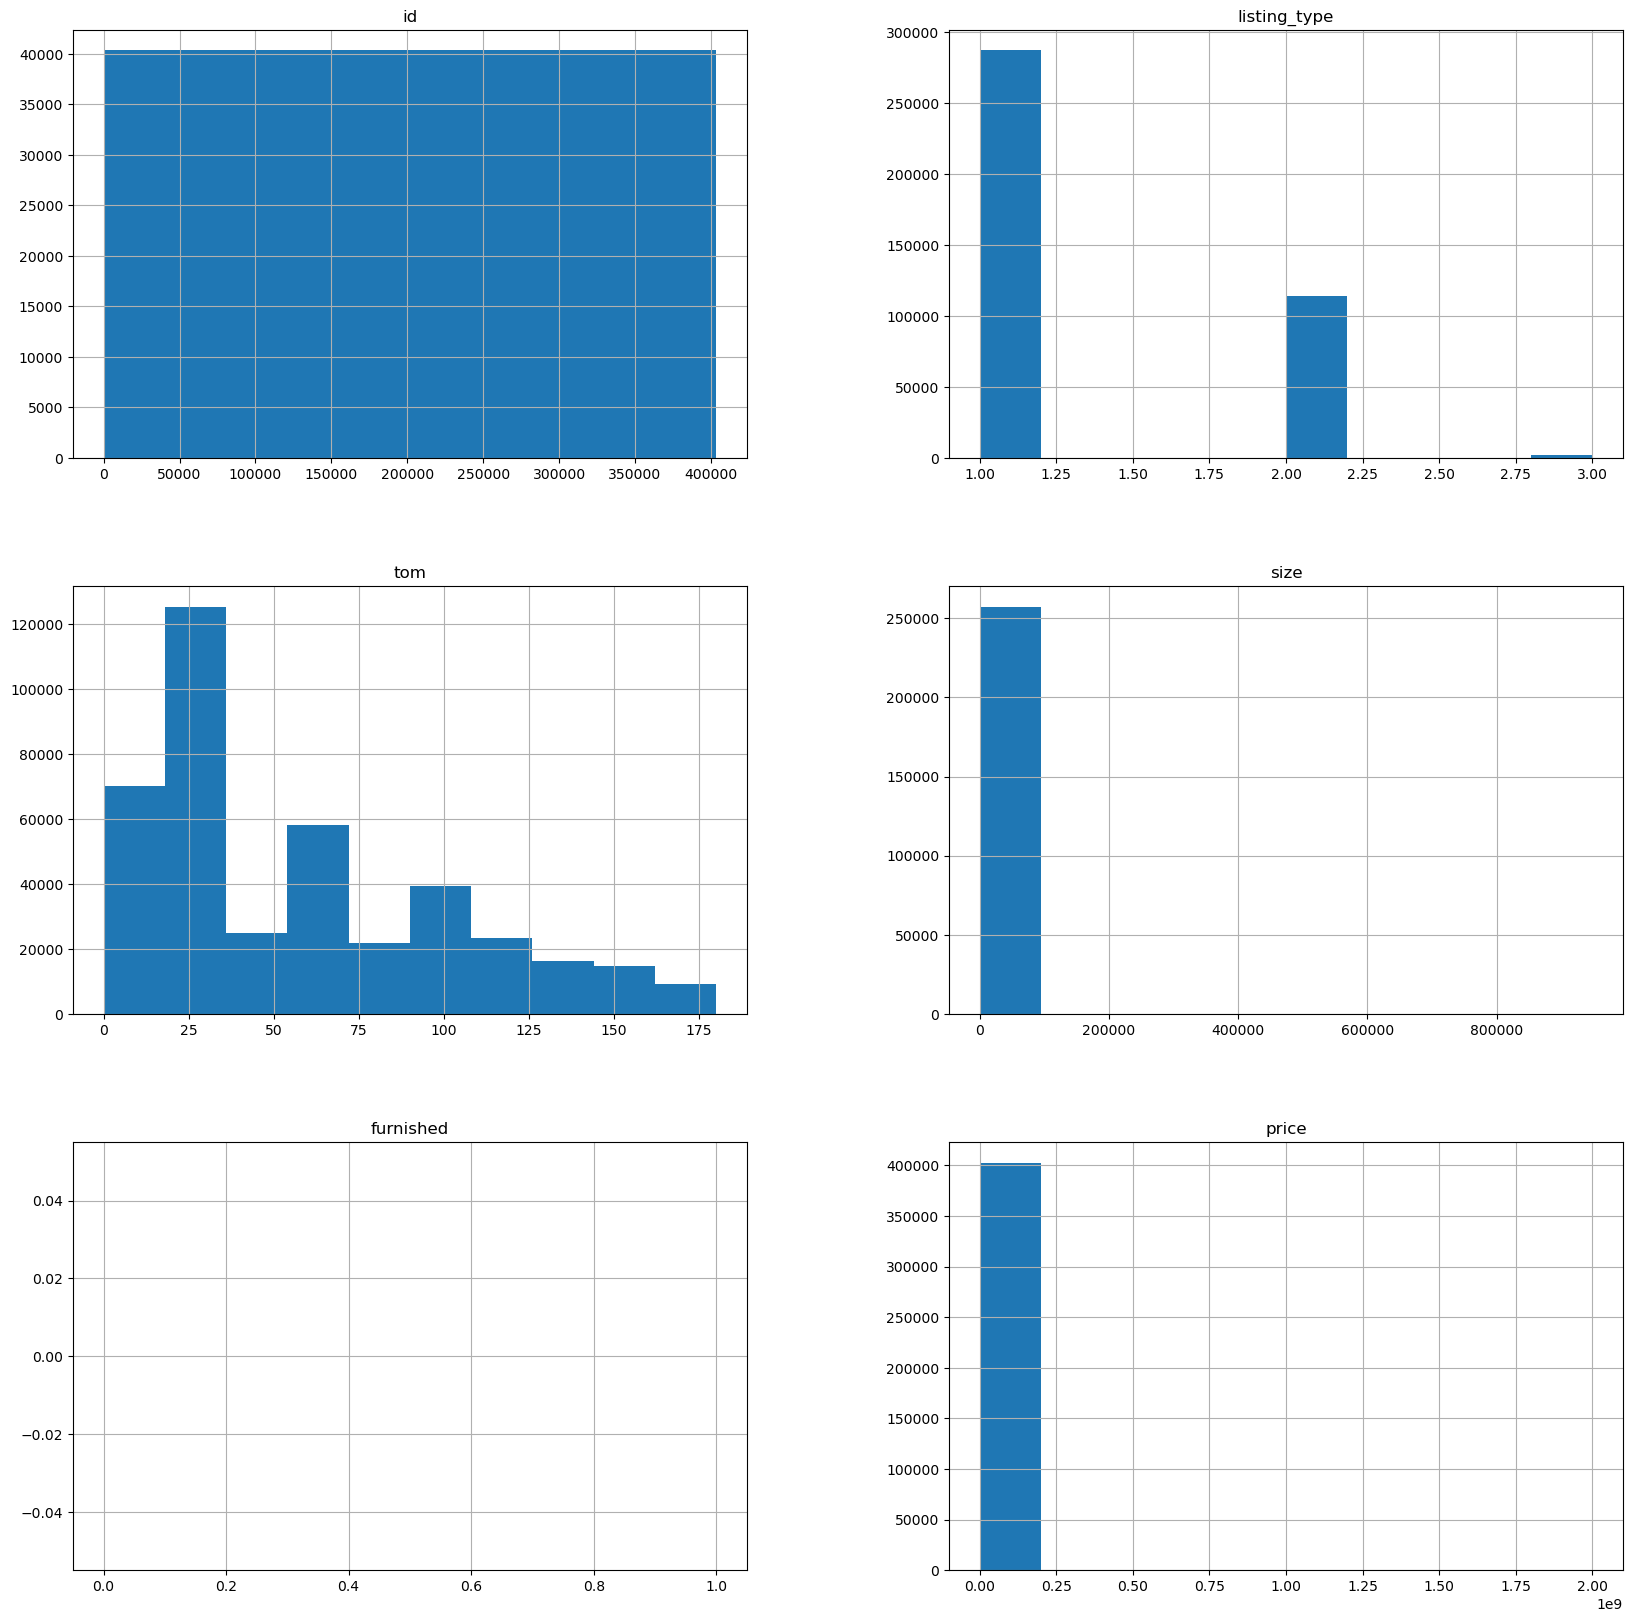

In [8]:
df.hist(figsize=(20,20))

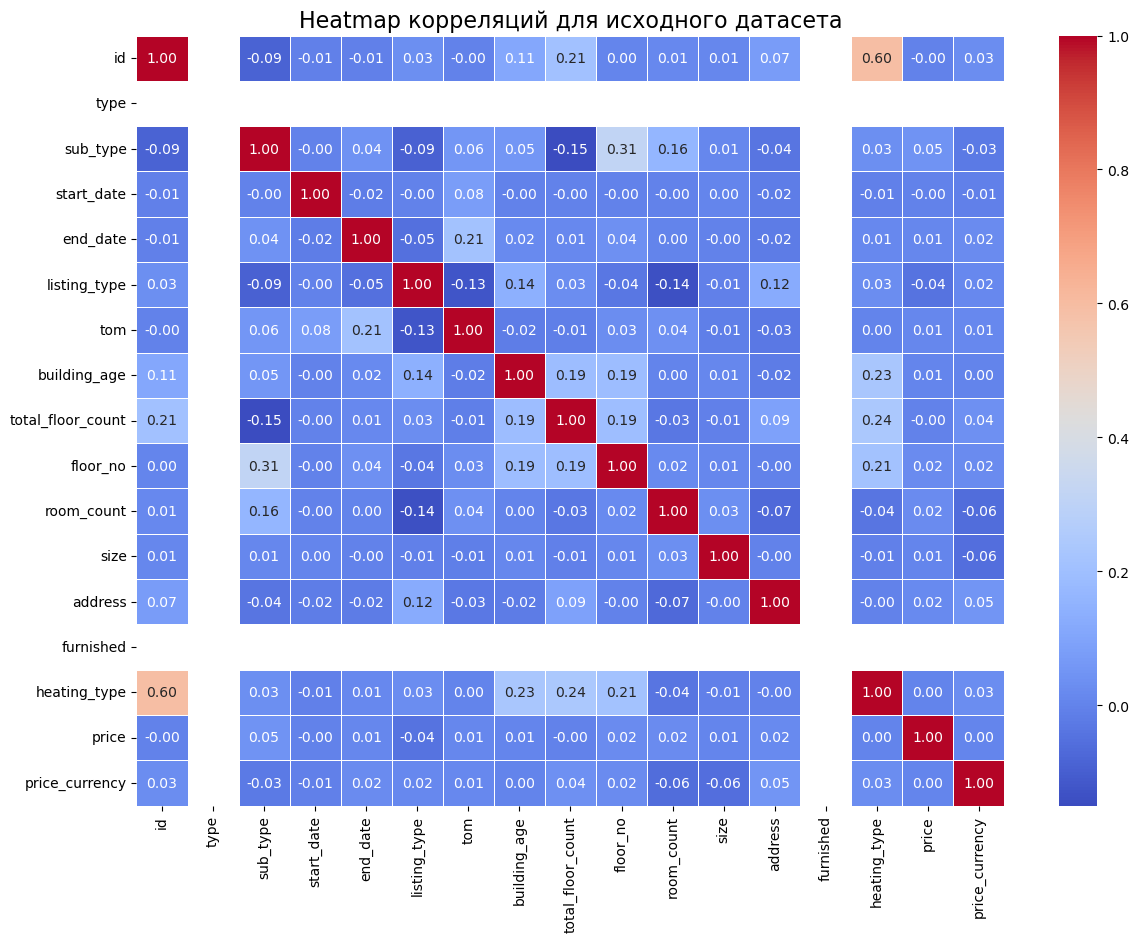

In [9]:
df_encoded = df.copy()

# === 3. LabelEncoder для категориальных колонок ===
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype(str)  # преобразуем в строки
        df_encoded[col] = le.fit_transform(df_encoded[col])

# === 4. Строим корреляционную матрицу ===
corr = df_encoded.corr()

# === 5. Рисуем heatmap ===
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap корреляций для исходного датасета", fontsize=16)
plt.show()

In [10]:
df.head().T

,0,1,2,3,4
id,1,2,3,4,5
type,Konut,Konut,Konut,Konut,Konut
sub_type,Rezidans,Daire,Daire,Rezidans,Rezidans
start_date,12/10/18,2/13/19,10/9/18,9/10/18,12/10/18
end_date,1/9/19,NaN,11/8/18,10/10/18,1/9/19
listing_type,2,1,1,1,1
tom,30,14,30,30,30
building_age,0,0,0,3,0
total_floor_count,20 ve üzeri,20 ve üzeri,1,20 ve üzeri,20 ve üzeri
floor_no,2,20 ve üzeri,Yüksek Giriş,20 ve üzeri,2


In [11]:
# Тип недвижимости
type_map = {"Konut": "Housing"}
sub_type_map = {"Daire": "Flat", "Rezidans": "Residence"}
listing_type_map = {1: "Sale", 2: "Rent"}

# Этаж
floor_map = {
    "Yüksek Giriş": "1",
    "Giriş Kat": "Ground floor",
    "Kot1": "Ground floor",
    "Zemin Kat": "Ground floor",
    "Çatı Katı": "Penthouse",
    "Bahçe Katı": "Garden floor flat",
    "Kot 1": 1,
    "Kot 2": 2,
    "Kot 3": 3,
    "Kot 4": 4,
    "Bodrum Kat": "-1",
    "Müstakil": "One-storey house",
    "Bahçe katı": "Floor with garden",
    "Giriş Katı": "Ground floor",
    "Komple": "Full floor",
    "En Üst Kat": "Max floor",
    "Asma Kat": "Suspended floor",
    "Teras Kat": "Terrace floor",
    
}

# Отопление
heating_map = {
    "Kalorifer (Doğalgaz)": "Central heating (Natural gas)",
    "Kalorifer (Kömür)": "Central heating (Coal)",
    "Kombi (Elektrikli)": "Combi boiler (Electric)",
    "Klima": "Air conditioning",
    "Kombi (Doğalgaz)": "Combi boiler (Gas)",
    "Merkezi Sistem": "Central heating",
    "Merkezi Sistem (Isı Payı Ölçer)": "Central heating (Metered)",
    "Yerden Isıtma": "Floor heating",
    "Soba (Kömür)": "Stove (Coal)",
    "Soba (Doğalgaz)": "Stove (Natural gas)",
    "Güneş Enerjisi": "Solar energy",
    "Jeotermal": "Geothermal energy",
    "Fancoil": "Fancoil (AC type)",
    "Kat Kaloriferi": "Central heating",
    "Kalorifer (Akaryakıt)": "Central heating (Fuel oil)",
    "Yok": "None",
}

# Применяем словари
df["type"] = df["type"].replace(type_map)
df["sub_type"] = df["sub_type"].replace(sub_type_map)
df["listing_type"] = df["listing_type"].replace(listing_type_map)
df["floor_no"] = df["floor_no"].replace(floor_map)
df["heating_type"] = df["heating_type"].replace(heating_map)

Перевели турецкие слова в английские и заменяем их в наборе даных

#### Смотрим как получися перевод

In [12]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Housing,Residence,12/10/18,1/9/19,Rent,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil (AC type),3500.0,TRY
1,2,Housing,Flat,2/13/19,NaN,Sale,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil (AC type),490000.0,TRY
2,3,Housing,Flat,10/9/18,11/8/18,Sale,30,0,1,1,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil (AC type),155000.0,TRY
3,4,Housing,Residence,9/10/18,10/10/18,Sale,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil (AC type),32500000.0,TRY
4,5,Housing,Residence,12/10/18,1/9/19,Sale,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil (AC type),1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Housing,Flat,9/18/18,NaN,Rent,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403483,403484,Housing,Flat,10/11/18,NaN,Sale,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403484,403485,Housing,Flat,11/22/18,NaN,Sale,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR
403485,403486,Housing,Flat,2/21/19,NaN,Rent,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,NaN,900.0,TRY


Видно, что перевелось не все

#### Разделим адрес на город, округ и район

In [13]:
df[["city", "county", "district"]] = df["address"].str.split("/", expand=True)
#адрес

In [14]:
df_cleaned = df.drop(columns=["id", "address", "furnished", "start_date", "end_date"])

In [15]:
df_cleaned.head().T

,0,1,2,3,4
type,Housing,Housing,Housing,Housing,Housing
sub_type,Residence,Flat,Flat,Residence,Residence
listing_type,Rent,Sale,Sale,Sale,Sale
tom,30,14,30,30,30
building_age,0,0,0,3,0
total_floor_count,20 ve üzeri,20 ve üzeri,1,20 ve üzeri,20 ve üzeri
floor_no,2,20 ve üzeri,1,20 ve üzeri,2
room_count,2+1,1+0,2+1,6+1,2+1
size,90.0,43.0,NaN,450.0,90.0
heating_type,Fancoil (AC type),Fancoil (AC type),Fancoil (AC type),Fancoil (AC type),Fancoil (AC type)


#### Переведем остатки и возраст здания в нормальный вид

In [16]:
def clean_building_age(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    # Если есть "arası" → оставляем только числа до слова
    if "arası" in x:
        return x.replace("arası", "").strip()
    # Если есть "ve üzeri" → делаем формат "X+"
    elif "ve üzeri" in x:
        return x.replace("ve üzeri", "+").strip()
    else:
        return x

df_cleaned["building_age"] = df_cleaned["building_age"].apply(clean_building_age)
df_cleaned["total_floor_count"] = df_cleaned["total_floor_count"].replace({"20 ve üzeri": "20+"})
df_cleaned["total_floor_count"] = df_cleaned["total_floor_count"].replace({"10-20 arası": "10-20"})
df_cleaned["floor_no"] = df_cleaned["floor_no"].replace({"20 ve üzeri": "20+"})
def total_rooms(x):
    try:
        parts = x.split("+")
        rooms = int(parts[0]) if parts[0].isdigit() else 0
        living = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else 0
        return rooms + living
    except:
        return np.nan

df_cleaned["total_rooms"] = df_cleaned["room_count"].apply(total_rooms)
df_cleaned = df_cleaned.drop(columns=["room_count"])

In [17]:
df_cleaned.head().T

,0,1,2,3,4
type,Housing,Housing,Housing,Housing,Housing
sub_type,Residence,Flat,Flat,Residence,Residence
listing_type,Rent,Sale,Sale,Sale,Sale
tom,30,14,30,30,30
building_age,0,0,0,3,0
total_floor_count,20+,20+,1,20+,20+
floor_no,2,20+,1,20+,2
size,90.0,43.0,NaN,450.0,90.0
heating_type,Fancoil (AC type),Fancoil (AC type),Fancoil (AC type),Fancoil (AC type),Fancoil (AC type)
price,3500.0,490000.0,155000.0,32500000.0,1450000.0


#### Смотрим какие типы валют и какое количество записей с каждой из них

In [18]:
df_cleaned["price_currency"].value_counts()

price_currency
TRY    400677
EUR       922
GBP       621
USD       552
Name: count, dtype: int64

Видно что лиры преобладают поэтому переводим все цены в лиры по актуальным курсам

In [19]:
exchange_rates = {"USD": 41, "EUR": 48, "GBP": 55, "TRY": 1}

def convert_price(row):
    price = row["price"]
    currency = row["price_currency"]
    
    # Если цена или валюта отсутствуют → оставляем NaN
    if pd.isna(price) or pd.isna(currency):
        return np.nan
    
    # Если валюта есть в словаре → конвертируем
    if currency in exchange_rates:
        return price * exchange_rates[currency]
    
    # Если валюта неизвестна → NaN
    return np.nan

# Преобразуем цену
df_cleaned["price_converted"] = df_cleaned.apply(convert_price, axis=1)

# Заменяем price и валюту на новые значения
df_cleaned["price"] = df_cleaned["price_converted"]
df_cleaned["price_currency"] = "TRY"
df_cleaned = df_cleaned.drop(columns=["price_converted"])

#### Далее смотрим количество уникальных записей с номером этажа 

In [20]:
df_cleaned["floor_no"].value_counts()

floor_no
2                    60914
1                    52614
3                    35993
4                    23318
1                    23223
One-storey house     21165
3                    20490
Floor with garden    19065
Ground floor         13872
4                    13416
5                    12495
2                     9937
5                     8698
6                     5116
9                     4855
6                     4631
8                     4608
7                     4398
10                    3863
Penthouse             3566
7                     3300
Full floor            2958
11                    2894
12                    2308
13                    1702
20+                   1563
8                     1491
14                    1328
15                     911
Max floor              894
-1                     815
16                     600
17                     373
18                     334
Terrace floor          293
19                     177
Suspended floor    

Можно заметить что номера дублируются и некторые строковые можно сгруппировать в несколько признаков

In [21]:
def clean_floor_no(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()

    # Нормализация известных категорий
    mapping = {
        "Ground floor": "0",
        "1st floor": "1",
        "Garden floor flat": "0",
        "Floor with garden": "0",
        "Terrace floor": "Top",
        "Penthouse": "Top",
        "Max floor": "Top",
        "Full floor": "Full",
        "One-storey house": "1",
        "Suspended floor": "Other"
    }

    if x in mapping:
        return mapping[x]

    # Убираем возможные дубликаты формата
    if x.isdigit() or (x.startswith("-") and x[1:].isdigit()):
        return str(int(x))  # Преобразуем к числу и обратно в строку (убираем пробелы и лидирующие нули)

    # Если это "20+" → оставляем как есть
    if "+" in x:
        return x

    return x

# Применяем очистку
df_cleaned["floor_no"] = df_cleaned["floor_no"].apply(clean_floor_no)

# Проверим уникальные значения после очистки
print(df_cleaned["floor_no"].value_counts().head(20))

floor_no
1       97002
2       70851
3       56483
4       36734
0       32937
5       21193
6        9747
7        7698
8        6099
9        4855
Top      4753
10       3863
Full     2958
11       2894
12       2309
13       1702
20+      1563
14       1328
15        911
-1        815
Name: count, dtype: int64


Осуществили замену теперь все в порядке

#### Смотрим соотношение количества пропущенных значений по отношению ко всему количеству строк

In [22]:
for  col in df.columns:
    print((col, df[col].isna().sum() / df.shape[0]))

('id', np.float64(0.0))
('type', np.float64(0.0))
('sub_type', np.float64(0.0))
('start_date', np.float64(0.0))
('end_date', np.float64(0.3400084761095153))
('listing_type', np.float64(0.0))
('tom', np.float64(0.0))
('building_age', np.float64(0.06788322796025646))
('total_floor_count', np.float64(0.06944709494977533))
('floor_no', np.float64(0.087477415629252))
('room_count', np.float64(0.0))
('size', np.float64(0.36186048125466247))
('address', np.float64(0.0))
('furnished', np.float64(1.0))
('heating_type', np.float64(0.06932069682542437))
('price', np.float64(0.0017720521355087029))
('price_currency', np.float64(0.0017720521355087029))
('city', np.float64(0.0))
('county', np.float64(1.7348762165819468e-05))
('district', np.float64(3.965431352187307e-05))


Здесь видно что многие признаки имюет довольно много пропусков

In [23]:
df_cleaned["floor_no"].value_counts()

floor_no
1        97002
2        70851
3        56483
4        36734
0        32937
5        21193
6         9747
7         7698
8         6099
9         4855
Top       4753
10        3863
Full      2958
11        2894
12        2309
13        1702
20+       1563
14        1328
15         911
-1         815
16         600
17         373
18         334
19         177
Other       12
Name: count, dtype: int64

#### Смотрим статичстическую информацию о цене

In [24]:
df_cleaned["price"].describe().apply(lambda x: f"{x:,.2f}")

count          402,772.00
mean           461,786.27
std          6,631,742.02
min               -250.00
25%              2,500.00
50%            200,000.00
75%            348,000.00
max      2,000,000,000.00
Name: price, dtype: object

Видим что есть отрицательная цена

#### Смотрим какое количество недвижимости имеет очень низкую цену

In [25]:
(df_cleaned["price"] < 100).sum()

np.int64(1852)

Очень низкую цену имеет 1852 записи

In [26]:
df_cleaned = df_cleaned[df_cleaned["price"] > 0].copy()

Оставляем записи где цена выше 0

In [27]:
df_cleaned["price"].describe().apply(lambda x: f"{x:,.2f}")

count          402,727.00
mean           461,837.87
std          6,632,110.72
min                  1.00
25%              2,500.00
50%            200,000.00
75%            348,000.00
max      2,000,000,000.00
Name: price, dtype: object

Видим, что минимальная цена 1 лир, а максимальная 2,000,000,000 лир

In [28]:
low_price_cities = df_cleaned[df_cleaned["price"] < 500]["city"].unique()

print("Города с ценами < 500 TRY:")
for city in low_price_cities:
    print(city)

Города с ценами < 500 TRY:
Antalya
İstanbul
Mersin
Sakarya
Tekirdağ
Manisa
İzmir
Afyonkarahisar
Aydın
Ankara
Şanlıurfa
Osmaniye
Adana
Trabzon
Konya
Bursa
Gaziantep
Isparta
Düzce
Eskişehir
Yozgat
Bilecik
Kırklareli
Karaman
Yalova
Malatya
Kastamonu
Balıkesir
Edirne
Sinop
Erzurum
Muğla
Kocaeli
Ağrı
KKTC
Ordu
Batman
Çanakkale
Diyarbakır
Kütahya
Bolu
Amasya
Kayseri
Zonguldak
Burdur
Denizli
Samsun
Aksaray
Niğde
Elazığ
Kırıkkale
Çorum
Sivas
Uşak
Adıyaman
Kırşehir
Erzincan
Çankırı
Rize
Giresun
Nevşehir
Kahramanmaraş
Tokat


In [29]:
df_cleaned.shape

(402727, 15)

In [30]:

df_cleaned = df_cleaned.dropna(subset=["heating_type"]).copy()
df_cleaned.shape

(375153, 15)

Удаляем столбец с типом отопления

In [31]:
df_cleaned.head().T

,0,1,2,3,4
type,Housing,Housing,Housing,Housing,Housing
sub_type,Residence,Flat,Flat,Residence,Residence
listing_type,Rent,Sale,Sale,Sale,Sale
tom,30,14,30,30,30
building_age,0,0,0,3,0
total_floor_count,20+,20+,1,20+,20+
floor_no,2,20+,1,20+,2
size,90.0,43.0,NaN,450.0,90.0
heating_type,Fancoil (AC type),Fancoil (AC type),Fancoil (AC type),Fancoil (AC type),Fancoil (AC type)
price,3500.0,490000.0,155000.0,32500000.0,1450000.0


In [32]:
df_cleaned["floor_no"] = df_cleaned["floor_no"].fillna("1")
df_cleaned["floor_no"].isna().sum()

np.int64(0)

In [33]:
df_cleaned["building_age"] = df_cleaned["building_age"].fillna("1")
df_cleaned["building_age"].isna().sum()

np.int64(0)

In [34]:
df_cleaned["total_floor_count"] = df_cleaned["total_floor_count"].fillna("1")
df_cleaned["total_floor_count"].isna().sum()

np.int64(0)

Заполнили пустые строки этажа, общего количества этажей и возраста здания на 1

In [35]:
for  col in df_cleaned.columns:
    print((col, df_cleaned[col].isna().sum() / df_cleaned.shape[0]))

('type', np.float64(0.0))
('sub_type', np.float64(0.0))
('listing_type', np.float64(0.0))
('tom', np.float64(0.0))
('building_age', np.float64(0.0))
('total_floor_count', np.float64(0.0))
('floor_no', np.float64(0.0))
('size', np.float64(0.34931348010011914))
('heating_type', np.float64(0.0))
('price', np.float64(0.0))
('price_currency', np.float64(0.0))
('city', np.float64(0.0))
('county', np.float64(7.996737331168883e-06))
('district', np.float64(2.1324632883117022e-05))
('total_rooms', np.float64(0.0))


Остаются пропуски у признаков size, county и district

In [36]:
df_cleaned["size"].describe()

count    244107.000000
mean        271.162060
std        9264.938939
min           1.000000
25%          85.000000
50%         110.000000
75%         140.000000
max      948235.000000
Name: size, dtype: float64

In [37]:
df_cleaned['size'] = df_cleaned.groupby(['city', 'county', 'district', 'total_rooms'])['size'].transform( lambda x: x.fillna(x.median()))

Заполнили площадь недвижимости медианой

In [38]:
for  col in df_cleaned.columns:
    print((col, df_cleaned[col].isna().sum() / df_cleaned.shape[0]))

('type', np.float64(0.0))
('sub_type', np.float64(0.0))
('listing_type', np.float64(0.0))
('tom', np.float64(0.0))
('building_age', np.float64(0.0))
('total_floor_count', np.float64(0.0))
('floor_no', np.float64(0.0))
('size', np.float64(0.017137008100694916))
('heating_type', np.float64(0.0))
('price', np.float64(0.0))
('price_currency', np.float64(0.0))
('city', np.float64(0.0))
('county', np.float64(7.996737331168883e-06))
('district', np.float64(2.1324632883117022e-05))
('total_rooms', np.float64(0.0))


Видно, что данные заполнилось не до конца, поэтому остальное удаляем

In [39]:
df_cleaned = df_cleaned.dropna(subset=["size"]).copy()

In [40]:
df_cleaned = df_cleaned.drop(columns=["county", "district"])

Удаляем столбы county и district за ненадобностью

In [41]:
for  col in df_cleaned.columns:
    print((col, df_cleaned[col].isna().sum() / df_cleaned.shape[0]))

('type', np.float64(0.0))
('sub_type', np.float64(0.0))
('listing_type', np.float64(0.0))
('tom', np.float64(0.0))
('building_age', np.float64(0.0))
('total_floor_count', np.float64(0.0))
('floor_no', np.float64(0.0))
('size', np.float64(0.0))
('heating_type', np.float64(0.0))
('price', np.float64(0.0))
('price_currency', np.float64(0.0))
('city', np.float64(0.0))
('total_rooms', np.float64(0.0))


В итоге получаем датасет без пропусков

In [42]:
for  col in df_cleaned.columns:
    print((df_cleaned[col].unique()))

['Housing']
['Residence' 'Flat' 'Villa' 'Müstakil Ev' 'Kooperatif' 'Yazlık'
 'Komple Bina' 'Prefabrik Ev' 'Köşk / Konak / Yalı' 'Çiftlik Evi'
 'Yalı Dairesi' 'Loft']
['Rent' 'Sale' 3]
[ 30  14  54  92  11   0  13 158  94  97 154 141  52  61 118  60 136  53
 114  34 142   7 140 117 127  47  80  42  78 161   8  64   1  31  48 138
 120   4  93  91 124  63  23 123   6 130  25  46  59  73   2  99   9  69
  21 134  44 121  76  79 139 151 126  90  51  55 156 100 152 129  28   3
  96  98   5  62 119  12  50 128  24 106 111 159  88 173 122  83 174  19
  17  68  40  15  29  67 160 110  75  37  70 131  43 145  66  49 150 132
  72  39 167  65 153 133  74 101  16  56 103 175  10  22  33 144 149  86
  77 108  38 146  45  32 170 104  87 177  26  27  84 107 148  81  82  18
 180 172 147 155 165 113  41  89  57  58  95 168  36  71  20  35 169  85
 143 112 102 116 137 125 105 162 109 115 163 179 166 176 171 135 157 164
 178]
['0' '3' '2' '1' '6-10' '16-20' '26-30' '40 +' '11-15' '4' '21-25' '5'
 '31-35' 

Просмотрели уникальные значения во всех столбцах

In [43]:
df_cleaned

,type,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,size,heating_type,price,price_currency,city,total_rooms
0,Housing,Residence,Rent,30,0,20+,2,90.0,Fancoil (AC type),3500.0,TRY,İstanbul,3
1,Housing,Flat,Sale,14,0,20+,20+,43.0,Fancoil (AC type),490000.0,TRY,İstanbul,1
2,Housing,Flat,Sale,30,0,1,1,95.0,Fancoil (AC type),155000.0,TRY,Tekirdağ,3
3,Housing,Residence,Sale,30,3,20+,20+,450.0,Fancoil (AC type),32500000.0,TRY,İstanbul,7
4,Housing,Residence,Sale,30,0,20+,2,90.0,Fancoil (AC type),1450000.0,TRY,İstanbul,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375512,Housing,Villa,Sale,94,0,2,1,168.0,Central heating,610000.0,TRY,Muğla,4
375513,Housing,Flat,Sale,60,1,5,2,46.0,Central heating,87000.0,TRY,Afyonkarahisar,2
375514,Housing,Residence,Sale,30,0,6,2,90.0,Central heating,310000.0,TRY,Aydın,3
375515,Housing,Flat,Sale,62,1,3,2,85.0,Central heating,360000.0,TRY,Balıkesir,3


In [45]:
df_cleaned[df_cleaned['listing_type'] == 3]

,type,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,size,heating_type,price,price_currency,city,total_rooms
361,Housing,Villa,3,110,2,3,1,2.0,Fancoil (AC type),8000.0,TRY,Muğla,3
2003,Housing,Flat,3,111,6-10,2,2,65.0,None,1400.0,TRY,Muğla,3
2467,Housing,Residence,3,30,3,10-20,2,52.0,None,50.0,TRY,İstanbul,2
3097,Housing,Residence,3,56,1,10-20,15,59.0,None,80.0,TRY,İstanbul,2
3745,Housing,Flat,3,12,6-10,2,2,110.0,None,2250.0,TRY,Muğla,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374333,Housing,Flat,3,9,3,5,3,126.0,Central heating,70.0,TRY,Bursa,2
374371,Housing,Flat,3,21,3,5,5,127.0,Central heating,70.0,TRY,Bursa,2
374430,Housing,Flat,3,21,3,5,5,127.0,Central heating,70.0,TRY,Bursa,2
375017,Housing,Flat,3,9,3,5,3,127.0,Central heating,70.0,TRY,Bursa,2


2096 записей с типом объявления, про котрое ничего не известно

#### Удаляем 3 вид объявления


In [46]:
df_cleaned = df_cleaned[df_cleaned['listing_type'] != 3]

In [47]:
df_cleaned

,type,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,size,heating_type,price,price_currency,city,total_rooms
0,Housing,Residence,Rent,30,0,20+,2,90.0,Fancoil (AC type),3500.0,TRY,İstanbul,3
1,Housing,Flat,Sale,14,0,20+,20+,43.0,Fancoil (AC type),490000.0,TRY,İstanbul,1
2,Housing,Flat,Sale,30,0,1,1,95.0,Fancoil (AC type),155000.0,TRY,Tekirdağ,3
3,Housing,Residence,Sale,30,3,20+,20+,450.0,Fancoil (AC type),32500000.0,TRY,İstanbul,7
4,Housing,Residence,Sale,30,0,20+,2,90.0,Fancoil (AC type),1450000.0,TRY,İstanbul,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375512,Housing,Villa,Sale,94,0,2,1,168.0,Central heating,610000.0,TRY,Muğla,4
375513,Housing,Flat,Sale,60,1,5,2,46.0,Central heating,87000.0,TRY,Afyonkarahisar,2
375514,Housing,Residence,Sale,30,0,6,2,90.0,Central heating,310000.0,TRY,Aydın,3
375515,Housing,Flat,Sale,62,1,3,2,85.0,Central heating,360000.0,TRY,Balıkesir,3


In [48]:
# df_encoded = df_cleaned.copy()
# df_encoded = df_encoded.drop(columns=['price_currency'])
# === 3. LabelEncoder для категориальных колонок ===
le = LabelEncoder()
df_encoded1 = df_cleaned.copy()
for col in df_encoded1.columns:
    if df_encoded1[col].dtype == "object":
        df_encoded1[col] = df_encoded1[col].astype(str)  # преобразуем в строки
        df_encoded1[col] = le.fit_transform(df_encoded1[col])
        for i,k in  list(zip(le.classes_, range(len(le.classes_)))):
            print (f"{i} - {k}")

Housing - 0
Flat - 0
Komple Bina - 1
Kooperatif - 2
Köşk / Konak / Yalı - 3
Loft - 4
Müstakil Ev - 5
Prefabrik Ev - 6
Residence - 7
Villa - 8
Yalı Dairesi - 9
Yazlık - 10
Çiftlik Evi - 11
Rent - 0
Sale - 1
0 - 0
1 - 1
11-15 - 2
16-20 - 3
2 - 4
21-25 - 5
26-30 - 6
3 - 7
31-35 - 8
36-40 - 9
4 - 10
40 + - 11
5 - 12
6-10 - 13
1 - 0
10 - 1
10-20 - 2
2 - 3
20+ - 4
3 - 5
4 - 6
5 - 7
6 - 8
7 - 9
8 - 10
9 - 11
-1 - 0
0 - 1
1 - 2
10 - 3
11 - 4
12 - 5
13 - 6
14 - 7
15 - 8
16 - 9
17 - 10
18 - 11
19 - 12
2 - 13
20+ - 14
3 - 15
4 - 16
5 - 17
6 - 18
7 - 19
8 - 20
9 - 21
Full - 22
Other - 23
Top - 24
Air conditioning - 0
Central heating - 1
Central heating (Coal) - 2
Central heating (Fuel oil) - 3
Central heating (Metered) - 4
Central heating (Natural gas) - 5
Combi boiler (Electric) - 6
Combi boiler (Gas) - 7
Fancoil (AC type) - 8
Floor heating - 9
Geothermal energy - 10
None - 11
Solar energy - 12
Stove (Coal) - 13
Stove (Natural gas) - 14
TRY - 0
Adana - 0
Adıyaman - 1
Afyonkarahisar - 2
Aksaray - 

Кодируем данные и сразу выводим значение и код

In [52]:
df_encoded1

,type,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,size,heating_type,price,price_currency,city,total_rooms
0,0,7,0,30,0,4,13,90.0,8,3500.0,0,78,3
1,0,0,1,14,0,4,14,43.0,8,490000.0,0,78,1
2,0,0,1,30,0,0,2,95.0,8,155000.0,0,66,3
3,0,7,1,30,7,4,14,450.0,8,32500000.0,0,78,7
4,0,7,1,30,0,4,13,90.0,8,1450000.0,0,78,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375512,0,8,1,94,0,3,2,168.0,1,610000.0,0,54,4
375513,0,0,1,60,1,7,13,46.0,1,87000.0,0,2,2
375514,0,7,1,30,0,8,13,90.0,1,310000.0,0,9,3
375515,0,0,1,62,1,5,13,85.0,1,360000.0,0,11,3


array([[<Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'sub_type'}>,
        <Axes: title={'center': 'listing_type'}>,
        <Axes: title={'center': 'tom'}>],
       [<Axes: title={'center': 'building_age'}>,
        <Axes: title={'center': 'total_floor_count'}>,
        <Axes: title={'center': 'floor_no'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'heating_type'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_currency'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'total_rooms'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

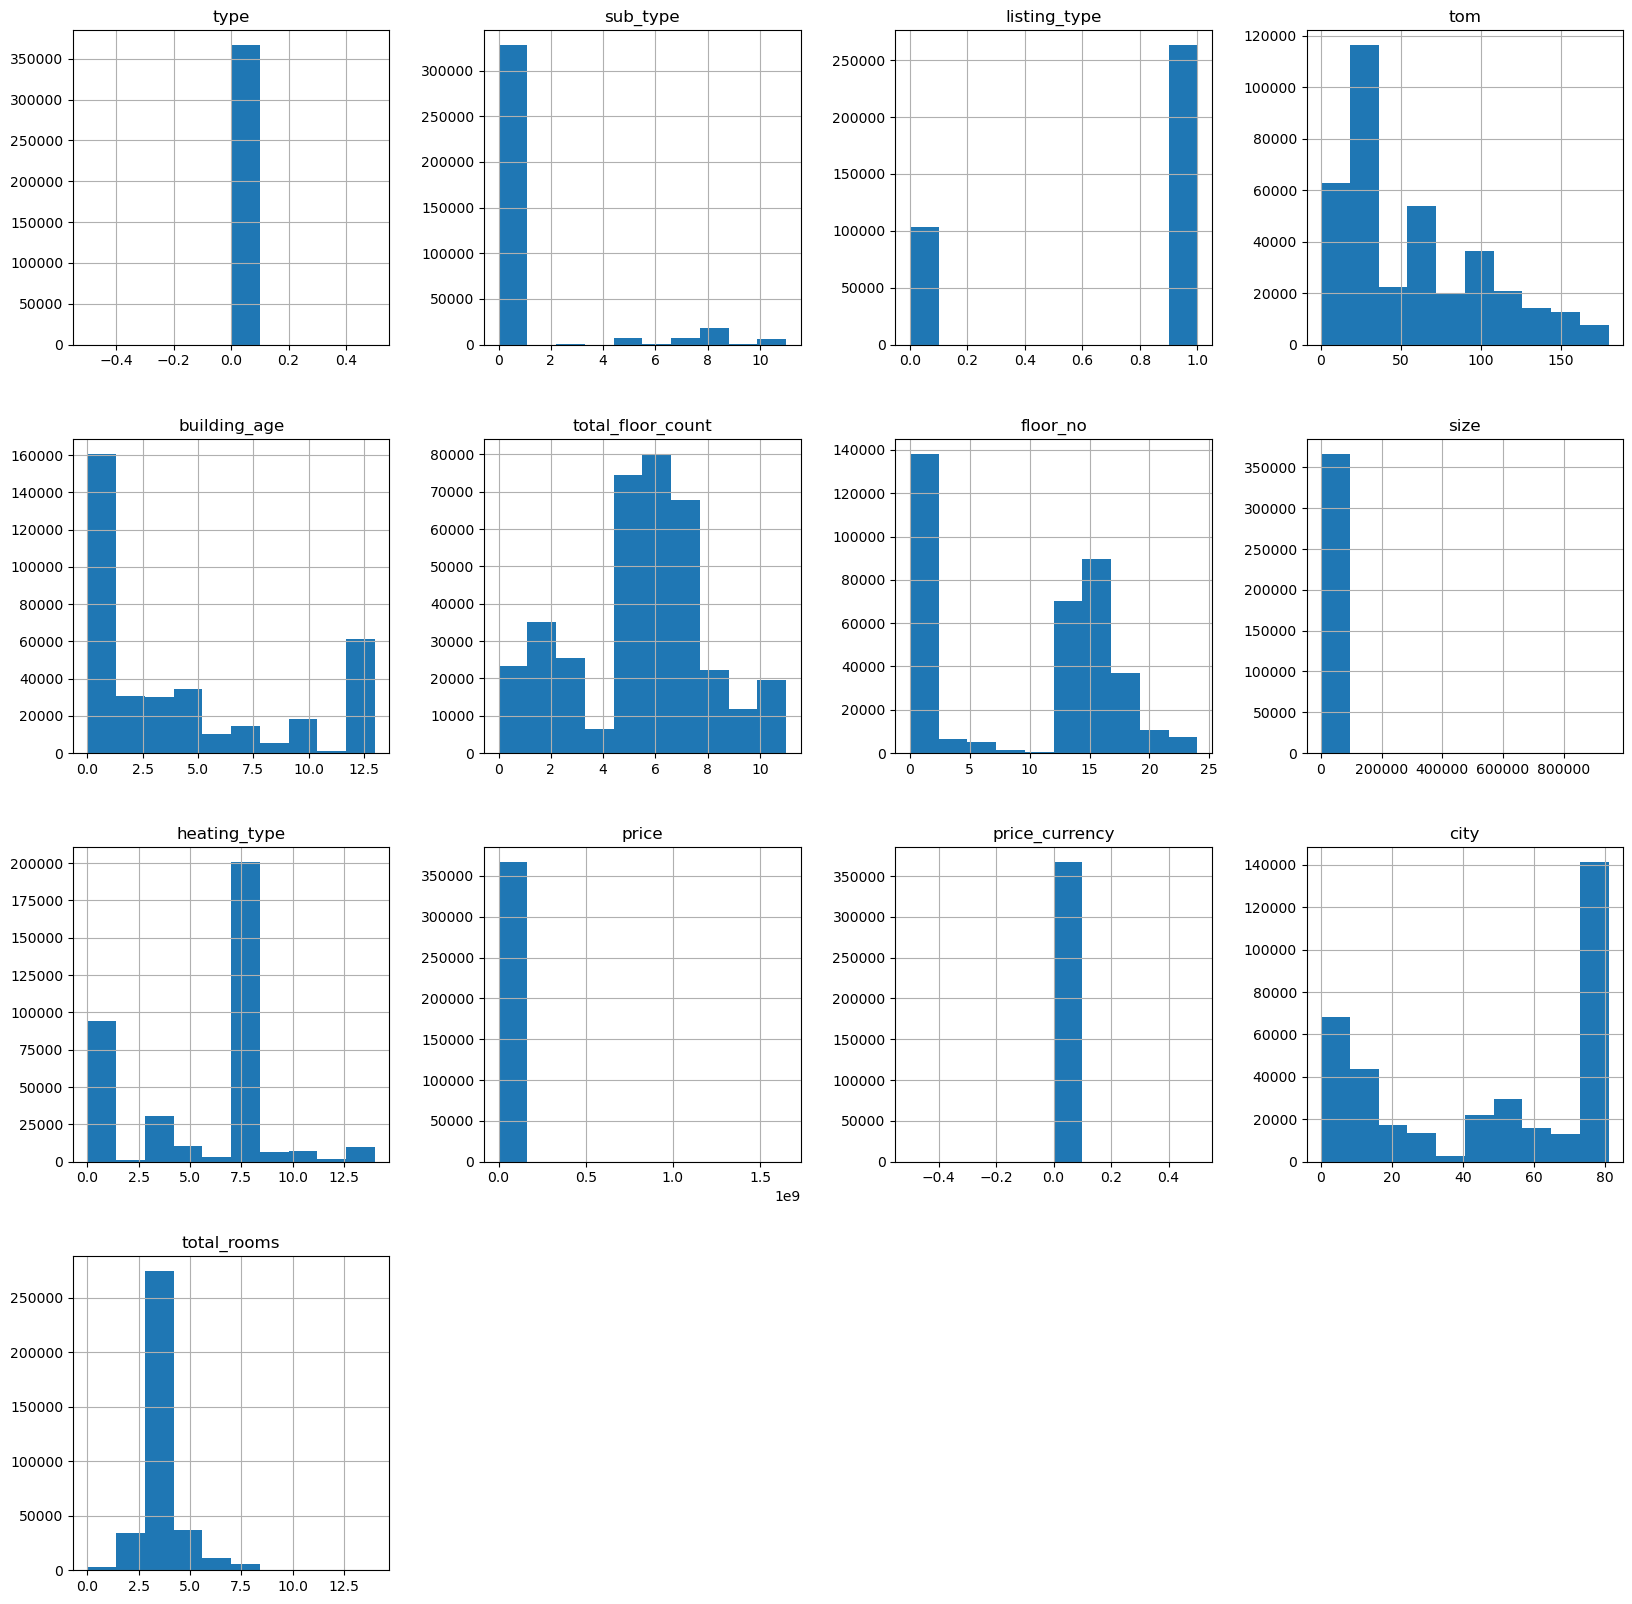

In [53]:
df_encoded1.hist(figsize=(20,20))

- В listing_type некоторые категории представлены значительно чаще других;
- в size большинство объектов имеют небольшой размер;

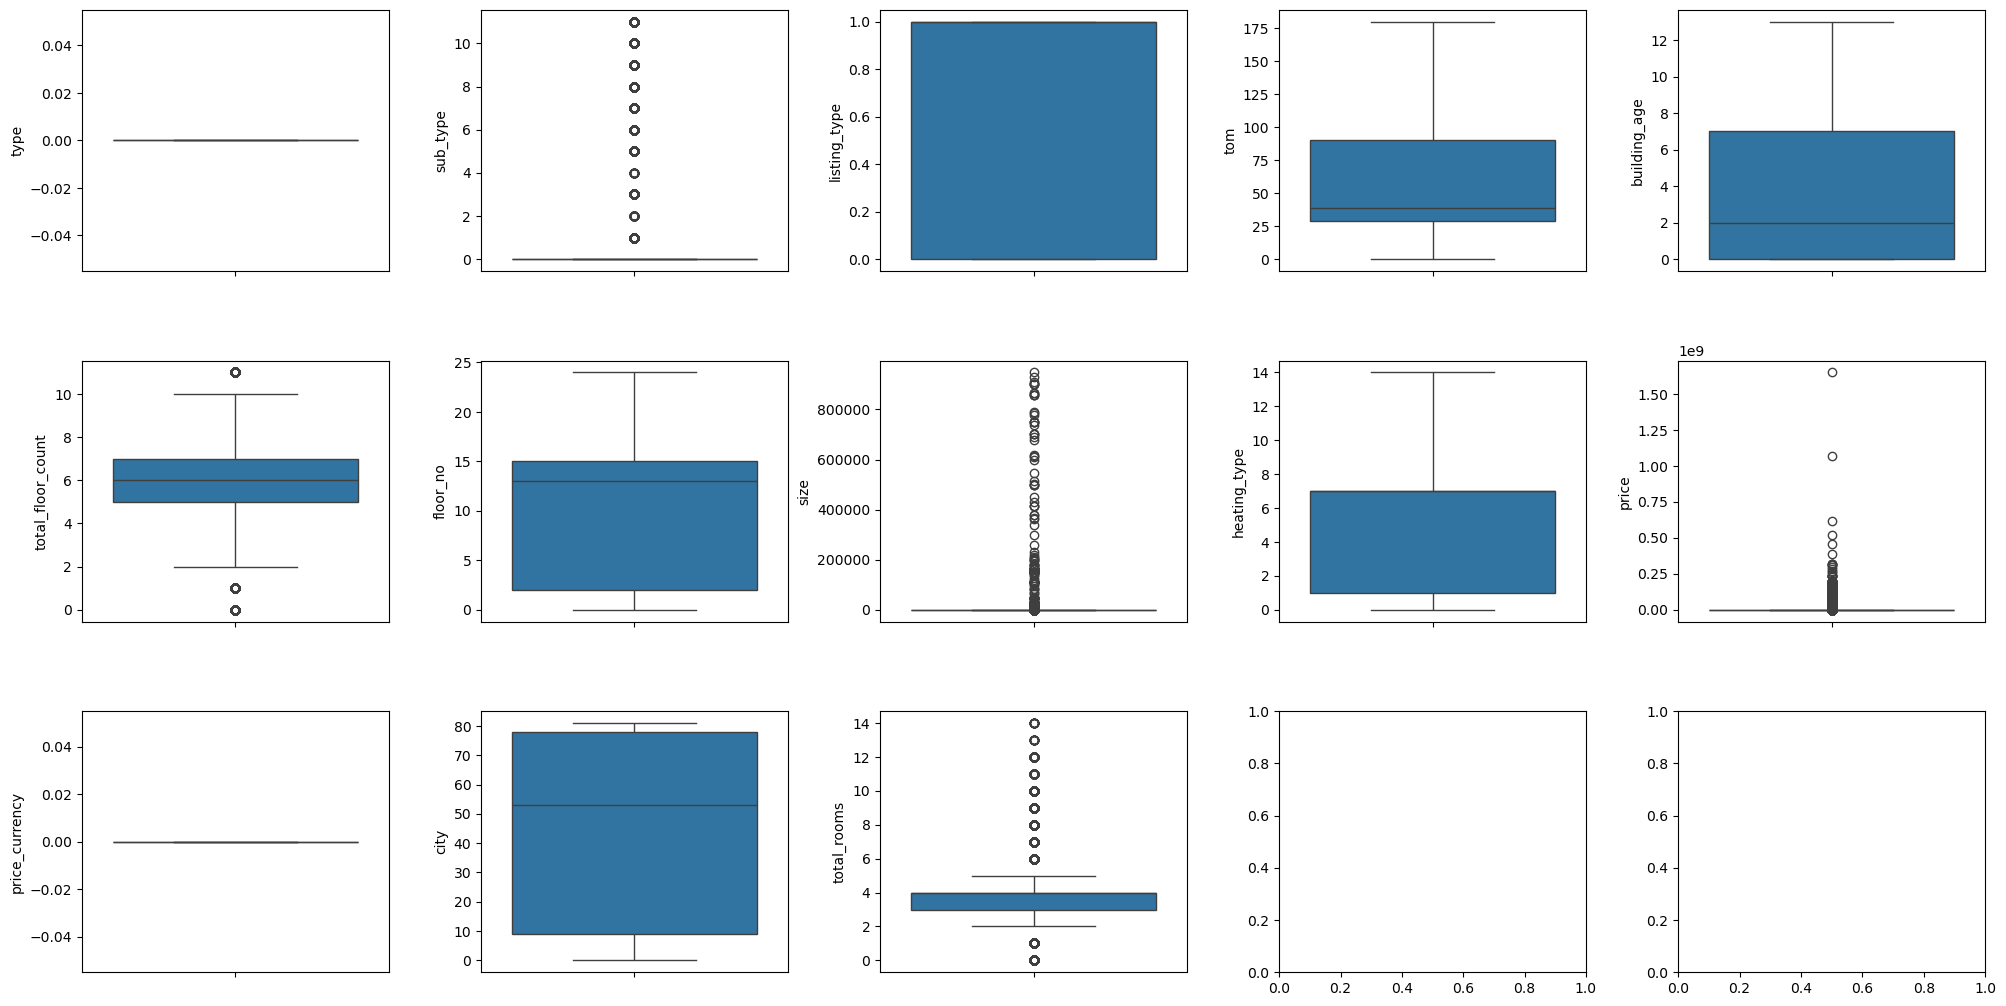

In [54]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_encoded1.items():
    sns.boxplot(y=col, data=df_encoded1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Можно заметить небольшие выбросы в tom, total_room_count, sub_type. Их можно объяснить. Также есть сильные выбросы в size, price и total_rooms

In [55]:
def outlier_analysis_df(df, col):
    outlier_dict = {}

    # Selected column
    column_data = df[col]

    sorted_data = sorted(column_data)

    # Calculate Q1 and Q3
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)

    # IQR (Interquartile Range)
    iqr = q3 - q1

    # Lower and Upper outlier sınırlarını hesapla
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr

    # Find Outliers
    outliers = [x for x in sorted_data if x < alt_sinir or x > ust_sinir]
    df_copy = df.copy()
    df_copy[col] = np.where((df_copy[col] < alt_sinir) | (df_copy[col] > ust_sinir), (q1 + q3) / 2, df_copy[col])

    outlier_dict[col] = outliers

    return df_copy, outlier_dict

In [56]:
df_encoded1, outliers_dict = outlier_analysis_df(df_encoded1, 'price')
df_encoded1, outliers_dict = outlier_analysis_df(df_encoded1, 'size')
df_encoded1, outliers_dict = outlier_analysis_df(df_encoded1, 'total_rooms')
df_encoded1, outliers_dict = outlier_analysis_df(df_encoded1, 'tom')
df_encoded1, outliers_dict = outlier_analysis_df(df_encoded1, 'floor_no')

Анализируем и обрабатываем выбросы медианными значениями

array([[<Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'sub_type'}>,
        <Axes: title={'center': 'listing_type'}>,
        <Axes: title={'center': 'tom'}>],
       [<Axes: title={'center': 'building_age'}>,
        <Axes: title={'center': 'total_floor_count'}>,
        <Axes: title={'center': 'floor_no'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'heating_type'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_currency'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'total_rooms'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

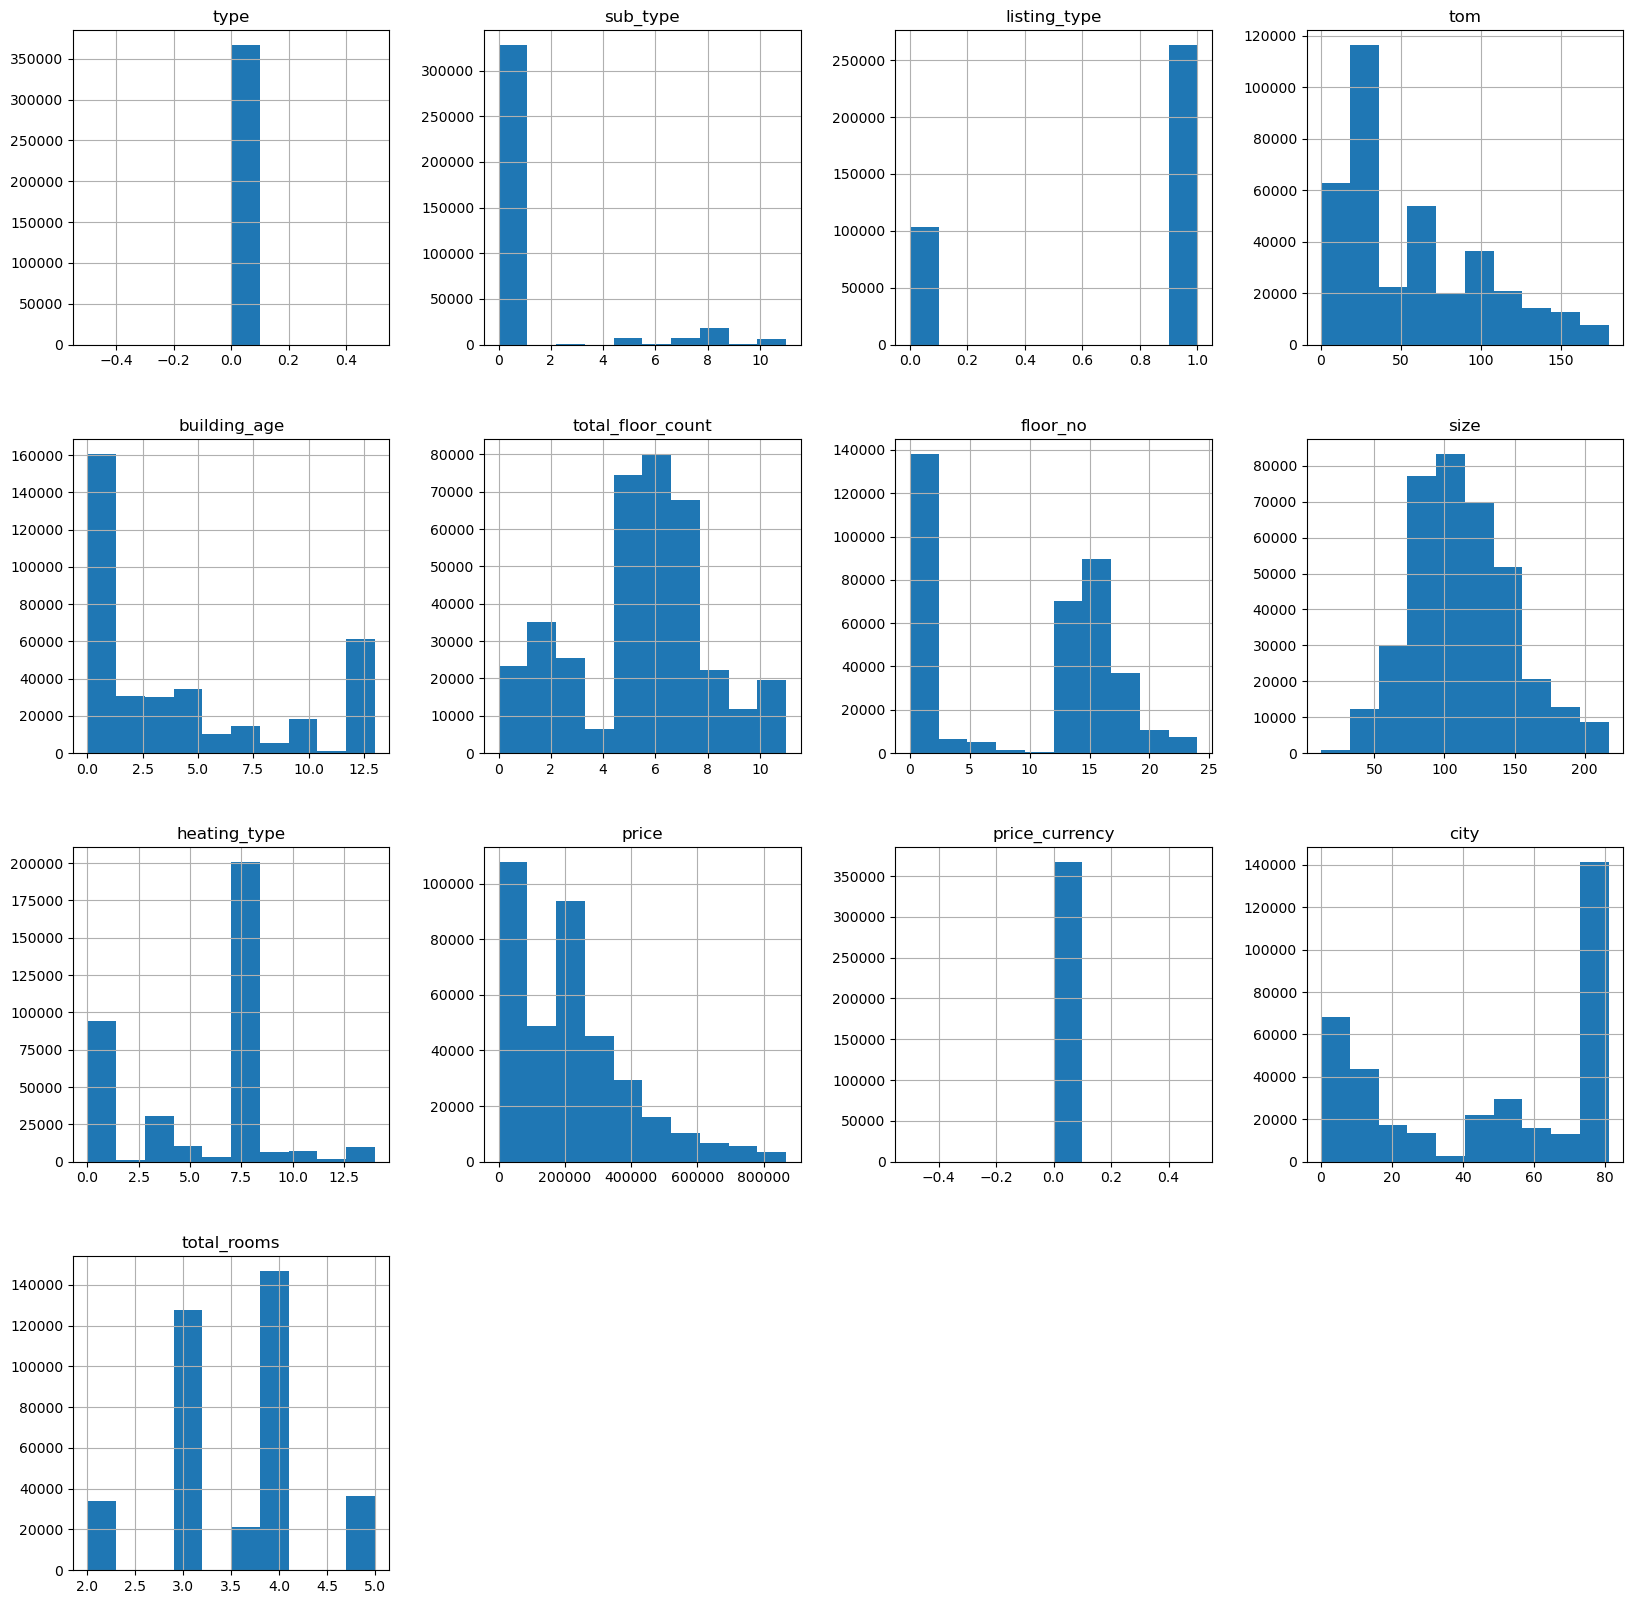

In [57]:
df_encoded1.hist(figsize=(20,20))

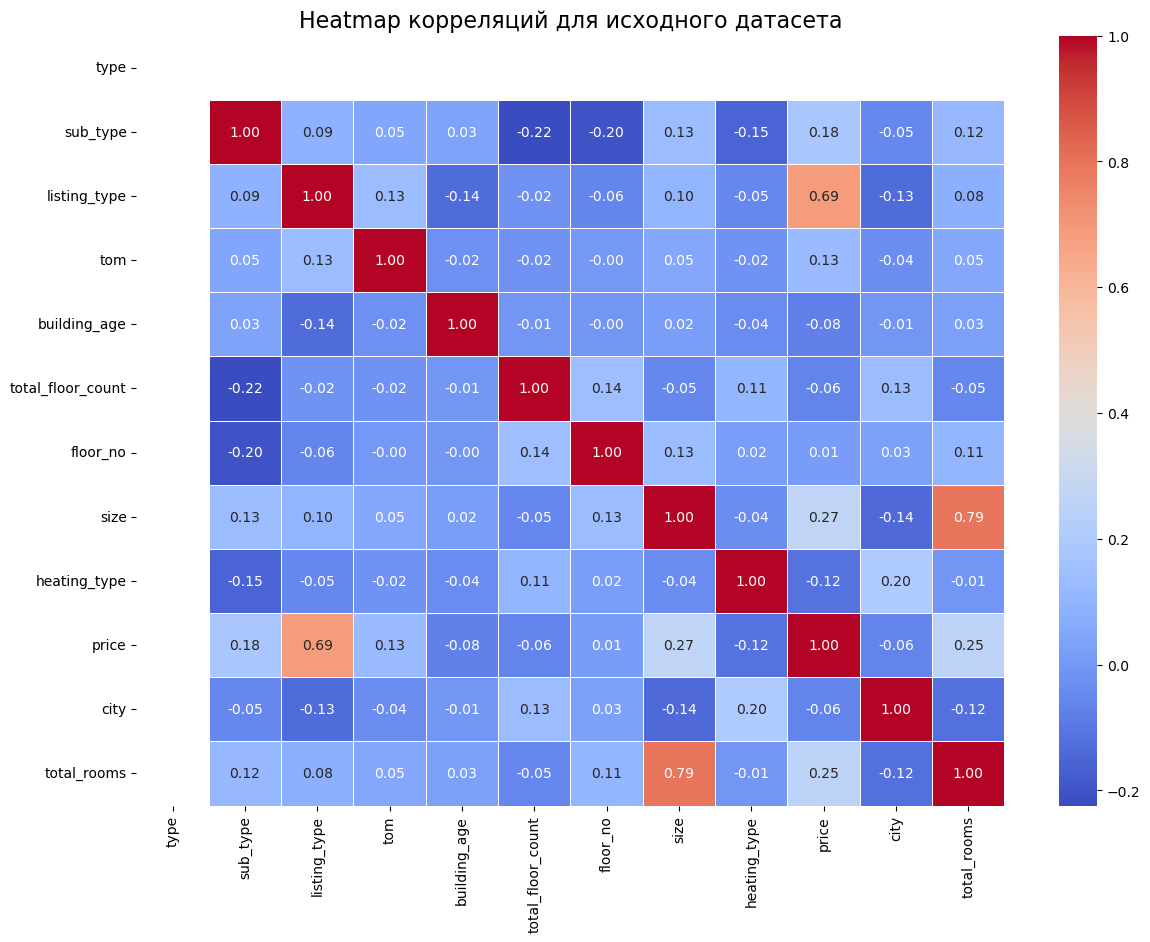

In [58]:
df_encoded1 = df_encoded1.drop(columns=['price_currency'])
corr = df_encoded1.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap корреляций для исходного датасета", fontsize=16)
plt.show()

Видим что на цену влияет тип объявления, а на площадь - кол-во комнат

## Обучение моделей



In [59]:
df_encoded1.columns

Index(['type', 'sub_type', 'listing_type', 'tom', 'building_age',
       'total_floor_count', 'floor_no', 'size', 'heating_type', 'price',
       'city', 'total_rooms'],
      dtype='object')

In [60]:
y1 = df_encoded1["price"]
y2 = df_encoded1["listing_type"]
X1 = df_encoded1.drop(columns=["price"])
X2 = df_encoded1.drop(columns=["listing_type"])# признаки

## Регрессия

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

Разбиваем данные на тестовую и тренировочную части

### BaggingRegressor

In [63]:
from sklearn.ensemble import BaggingRegressor

In [64]:
br = BaggingRegressor()
br.fit(X_train1, y_train1)

BaggingRegressor()

Проводим обучение с помощью модели BaggingRegressor

In [65]:
predictions1 = br.predict(X_test1)

In [66]:
predictions1

array([117200.        , 227000.        , 145900.        , ...,
         1185.        , 154390.        ,   1418.33333333])

Сделали предсказание на тестовых данных с помощью обученной модели

In [67]:
y_test1.round(3)

61328     125000.0
210511    210000.0
264772    180000.0
10824     220000.0
51757     300000.0
            ...   
125119    490000.0
113642       750.0
100651      1300.0
353987    159000.0
211620      1200.0
Name: price, Length: 109989, dtype: float64

Округлили значения до 3 знаков после запятой

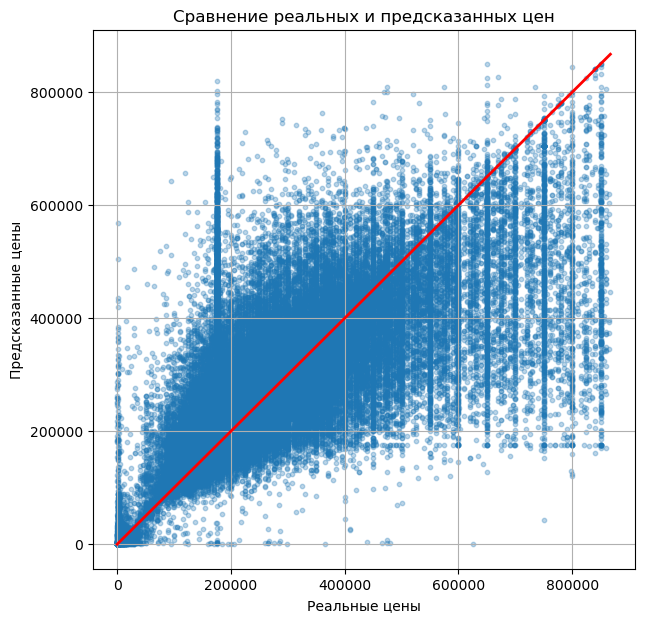

In [68]:


plt.figure(figsize=(7,7))
plt.scatter(y_test1, predictions1, alpha=0.3, s=10)  # s=10 уменьшает размер точек
plt.plot([y_test1.min(), y_test1.max()],
         [y_test1.min(), y_test1.max()],
         color="red", lw=2)  # диагональ y=x

plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Сравнение реальных и предсказанных цен")
plt.grid(True)
plt.show()

Модель улавливает общую зависимость цен, но предсказания сильно разбросаны вокруг линии идеала 𝑦=𝑥, что говорит о высокой погрешности.

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_absolute_error(y_test1, predictions1)

56067.858134378235

В среднем модель ошибается примерно на 56 тысяч в абсолютных значениях цены.

In [71]:
metrics.mean_squared_error(y_test1, predictions1)

10222490171.029266

Среднеквадратичная ошибка очень большая, потому что большие ошибки возводятся в квадрат и сильно влияют на итоговое значение.

In [72]:
np.sqrt(metrics.mean_squared_error(y_test1, predictions1))

np.float64(101106.33101358819)

Среднее отклонение предсказанных цен от реальных составляет примерно 101 тысячу.

In [73]:
br_r2 = metrics.r2_score(y_test1, predictions1)

### StackingRegressor

X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
estimators = [
    ('br', BaggingRegressor()),
    ('lr', LinearRegression())
]

In [77]:
from sklearn.ensemble import StackingRegressor

In [78]:
sr = StackingRegressor(estimators=estimators, final_estimator=BaggingRegressor())
sr.fit(X_train2, y_train2)

StackingRegressor(estimators=[('br', BaggingRegressor()),
                              ('lr', LinearRegression())],
                  final_estimator=BaggingRegressor())

Провели обучение StackingRegressor, где предсказания BaggingRegressor и LinearRegression комбинируются с помощью второго BaggingRegressor для финального прогноза

In [79]:
predictions2 = sr.predict(X_test2)
predictions2

array([148700. , 233300. , 156500. , ...,   1220. ,  97670. ,   1582.5])

Сделали предсказание на тестовых данных с помощью обученной модели

In [80]:
y_test2.round(3)

61328     125000.0
210511    210000.0
264772    180000.0
10824     220000.0
51757     300000.0
            ...   
125119    490000.0
113642       750.0
100651      1300.0
353987    159000.0
211620      1200.0
Name: price, Length: 109989, dtype: float64

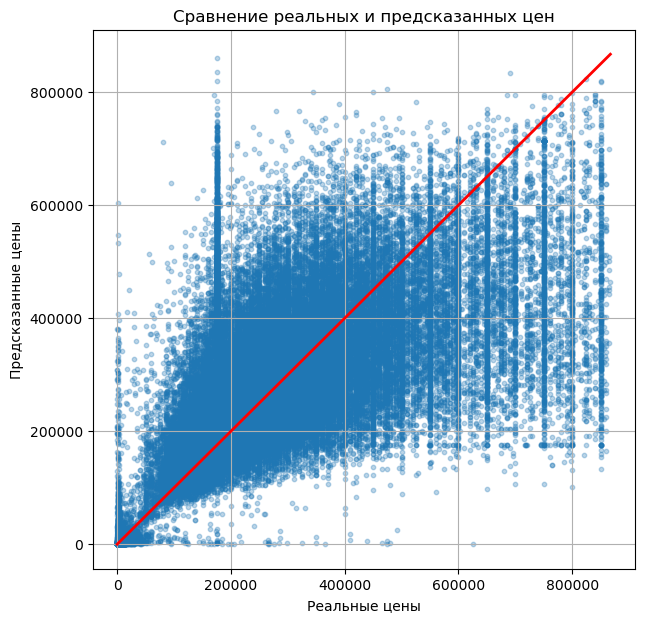

In [98]:


plt.figure(figsize=(7,7))
plt.scatter(y_test2, predictions2, alpha=0.3, s=10)  # s=10 уменьшает размер точек
plt.plot([y_test2.min(), y_test2.max()],
         [y_test2.min(), y_test2.max()],
         color="red", lw=2)  # диагональ y=x

plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Сравнение реальных и предсказанных цен")
plt.grid(True)
plt.show()

График демонстрирует значительное расхождение между реальными и предсказанными значениями, что указывает на низкую точность модели

In [82]:
metrics.mean_absolute_error(y_test2, predictions2)

65187.617032993265

В среднем модель ошибается примерно на 65 тысяч в абсолютных значениях цены.

In [83]:
metrics.mean_squared_error(y_test2, predictions2)

12556132616.195782

Чрезвычайно высокое значение ошибки, указывающее на очень низкую точность модели и большие расхождения между предсказаниями и реальными значениями.

In [84]:
np.sqrt(metrics.mean_squared_error(y_test2, predictions2))

np.float64(112054.15037469956)

In [85]:
metrics.r2_score(y_test2, predictions2)
sr_r2 = metrics.r2_score(y_test2, predictions2)

Сохранили значение метрики r2_score для дальнейшего сравнения

### Сравнение моделей

In [86]:
labels = ["Bagging Regressor", "Stacking Regressor"]

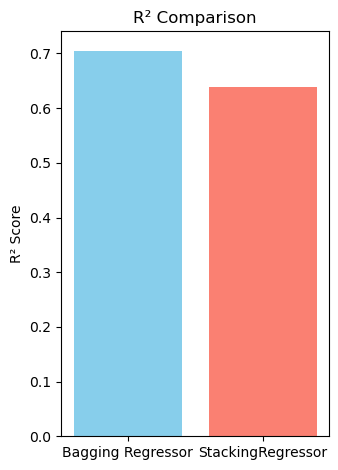

In [87]:
# R²
plt.subplot(1,2,2)
plt.bar(labels, [br_r2, sr_r2], color=["skyblue","salmon"])
plt.title("R² Comparison")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

Исходя из графика видим, что Bagging Regressor дает лучшие результаты нежели чем Stacking Regressor

## Классификация

In [88]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X2, y2, test_size=0.9, random_state=42
)

Разбили данные на тестовую и тренировочную части

### RandomForestClassifier

In [89]:
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
rf.fit(X_train3, y_train3)
y_pred_rf = rf.predict(X_test3)

Провели обучение с помощью RandomForestClassifier с балансировкой весов классов для работы с несбалансированными данными

In [90]:
# Метрики RF
rf_mse = mean_squared_error(y_test3, y_pred_rf)
rf_r2 = r2_score(y_test3, y_pred_rf)

Сохранили значения метрик для дальнейшего сравнения моделей

### Gradient Boosting

In [91]:
gbr = GradientBoostingClassifier(random_state=42)
gbr.fit(X_train3, y_train3)
y_pred_gbr = gbr.predict(X_test3)

Провели обучение с помощью модели Gradient Boosting

In [92]:
gbr_mse = mean_squared_error(y_test3, y_pred_gbr)
gbr_r2 = r2_score(y_test3, y_pred_gbr)

Сохранили значения метрик

In [93]:
# === 7. Вывод результатов ===
print("Random Forest → MSE:", rf_mse, " | R²:", rf_r2)
print("Gradient Boosting → MSE:", gbr_mse, " | R²:", gbr_r2)

Random Forest → MSE: 0.002194165459471582  | R²: 0.9891678943307303
Gradient Boosting → MSE: 0.0025245025245025244  | R²: 0.9875370938915723


In [94]:
labels = ["Random Forest", "Gradient Boosting"]

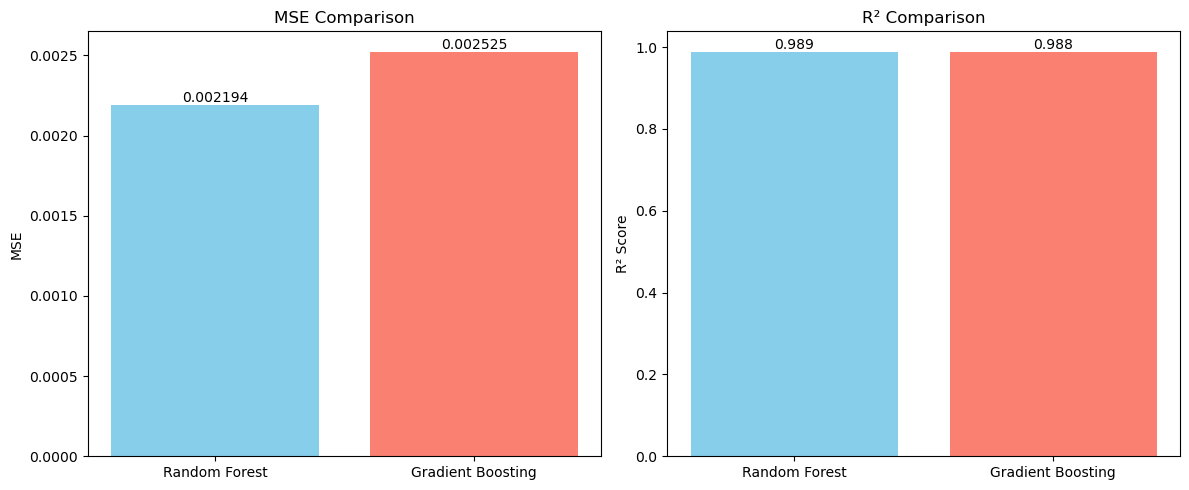

In [101]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
bars1 = plt.bar(labels, [rf_mse, gbr_mse], color=["skyblue","salmon"])
plt.title("MSE Comparison")
plt.ylabel("MSE")

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:,.6f}",
             ha='center', va='bottom')

plt.subplot(1,2,2)
bars2 = plt.bar(labels, [rf_r2, gbr_r2], color=["skyblue","salmon"])
plt.title("R² Comparison")
plt.ylabel("R² Score")

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.3f}",  
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Исходя из графиков мы видим, что Gradient Boosting чаще ошибается нежели чем Random Forest точность у них примерно одинаковая но если смотреть на числа, то Random Forest немного выигрывает

#### Загружаем обе модели в файл

In [96]:
import pickle

with open('model_reg_br_fasts3.pkl', 'wb') as f:
    pickle.dump(br, f)

In [97]:
import pickle

with open('model_clas_rf_fasts3.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Вывод

Проведён анализ и предобработка данных более чем по 400 тыс. объектов, реализовано кодирование категориальных признаков и очистка пропусков. Также были обработаны выбросы.

Были протестированы разные модели машинного обучения, среди которых наилучший результат показали алгоритмы 
- BaggingRegressor с R² ≈ 0.7 и минимальной ошибкой прогноза для задач регрессии; 
- Random Forest Classifier с R² ≈ 0.99 и минимальной ошибкой прогноза для задач классификации. 

Итогом работы стало создание надёжной модели, способной точно оценивать стоимость недвижимости и тип объявления на основе характеристик.